# Dynamics, Networks and Coputation - Exercise 2

|Yehonatan Ezra | yonatan.ezra@mail.huji.ac.il|

## 2. Fluctuations in Growth

### 2.1 - Behavior of The mean

The expected number of becteria N(t) grows exponentially because every cell divides independently at are u. the mean therefore satisfies the ordinany differential equation:

d⟨N⟩/dt = μ⟨N⟩, ⟨N(0)⟩ = N0.

Solving:
N0* e^uT = CN0 -> T = ln*C/u.

Thus T depends only on the growth rate u and the amplification factor C, and is independent of N0.


### 2.2 - Adding Stochasticity

In [ ]:
import numpy as np

def simulate_time(N0, mu, C):
    """
    Simulate one realization of the bacterial growth process.
    Returns T, the time to reach population size C * N0.
    """
    N = N0
    t = 0.0
    threshold = C * N0

    # Memoryless property
    while N < threshold:
        dt = np.random.exponential(1.0 / (N * mu))
        t += dt
        N += 1

    return t

#print (simulate_time(100,1,10))


### 2.3 - Fluctuations Around the Mean

In [ ]:
def analyze_fluctuations(N0_list, mu, C, trials):
    """
    Question 2.3 - For each initial population N0 in N0_list, this
    function runs simulate_time trials times, compute sample mean and
    sample std of T.
    compare sample std to theoretical 1/sqrt(N0)
    """
    print("N0\tmean_T\tstd_T\ttheoretical_1/sqrt(N0)")
    for N0 in N0_list:
        Ts = [simulate_time(N0, mu, C) for _ in range(trials)]
        mean_T = np.mean(Ts)
        std_T  = np.std(Ts, ddof=1)
        theo   = 1.0/np.sqrt(N0)
        print(f"{N0}\t{mean_T:.3f}\t{std_T:.3f}\t{theo:.3f}")

#  Main:
N0_list = [1, 10, 100, 1000, 10000]
analyze_fluctuations(N0_list, 1.0, 100,200)


N0	mean_T	std_T	theoretical_1/sqrt(N0)
1	5.218	1.301	1.000
10	4.642	0.313	0.316
100	4.619	0.101	0.100
1000	4.605	0.032	0.032
10000	4.605	0.009	0.010


my output:

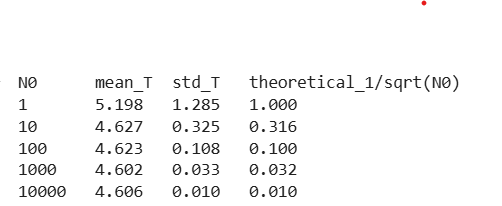

We can see that histogram of T are markedly right-skewed when N0 is small with a long tail toward larger times and ecome narrower and more symmetric as N0 increases.



## 3. Dunamics of The Deef Forward Loop

##### Helper function `create_plot` — this function is used in all parts of Section 3.

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def create_plot (lines, labels, labels_name, title):
  '''
    Helper function this function is used in all parts of Section 3.
  '''
  plt.figure()
  for i in range(len(lines)):
    plt.plot(time, lines[i], label = labels[i])
  plt.title(title)
  plt.xlabel(labels_name[0])
  plt.ylabel(labels_name[1])
  plt.legend()
  plt.show()

### 3.1 - FFL  Versus Regular Actication

#### 3.1.1 - simulating the FFL with an AND gate

##### code for 3.1.2 (Please make sure you run create_plot before)

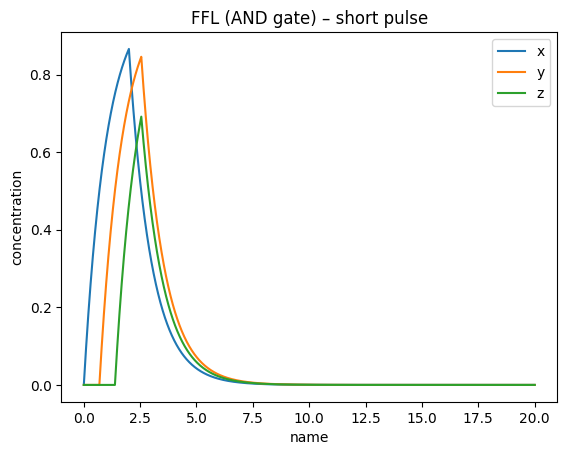

In [68]:
# Model parameters
beta_X = beta_Y = beta_Z = 1.0    # production rates
delta_X = delta_Y = delta_Z = 1.0  # degradation rates
K_XY = K_XZ = K_YZ = 0.5           # threshold values
dt = 0.01
T_max = 20.0
time = np.arange(0, T_max+dt, dt)

def simulate_ffl_and(pulse_duration):
    X = np.zeros_like(time)
    Y = np.zeros_like(time)
    Z = np.zeros_like(time)
    for i in range(len(time)-1):
        t = time[i]
        u = 1.0 if t < pulse_duration else 0.0

        dX = beta_X * u - delta_X * X[i]
        dY = beta_Y * (1.0 if X[i] > K_XY else 0.0) - delta_Y * Y[i]
        dZ = beta_Z * (
            (1.0 if X[i] > K_XZ else 0.0) *
            (1.0 if Y[i] > K_YZ else 0.0)
        ) - delta_Z * Z[i]

        X[i+1] = X[i] + dt * dX
        Y[i+1] = Y[i] + dt * dY
        Z[i+1] = Z[i] + dt * dZ

    return X, Y, Z


X_short, Y_short, Z_short = simulate_ffl_and(2)
create_plot([X_short, Y_short, Z_short], ['x','y','z'],['name', 'concentration'] ,'FFL (AND gate) – short pulse' )







Explanation - for a short input pulse (duration = 2):

X(t): Rises quickly toward its steady state during the pulse, then decays exponentially once the pulse ends.

Y(t): Turns on only after X(t) exceeds the threshold 𝐾 𝑋 𝑌 = 0.5 K XY =0.5; it lags behind X but follows the same decay once the pulse ends.

Z(t): Remains essentially zero for the entire simulation, because Z production requires both X > 0.5 and Y > 0.5 simultaneously. The short pulse does not keep both above threshold long enough to trigger Z.

This behavior illustrates that the coherent type-1 FFL with an AND gate filters out short input pulses, preventing downstream activation of Z unless the input is sufficiently persistent.

#### 3.1.2 - Regular Activation

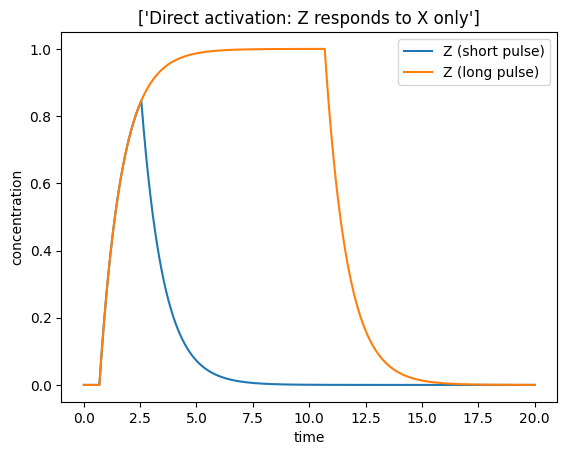

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the same parameters and time array:
beta_X = beta_Y = beta_Z = 1.0
delta_X = delta_Y = delta_Z = 1.0
K_XZ = 0.5
dt = 0.01
T_max = 20.0
time = np.arange(0, T_max+dt, dt)

def simulate_direct(pulse_duration):
    X = np.zeros_like(time)
    Z = np.zeros_like(time)
    for i in range(len(time)-1):
        t = time[i]
        u = 1.0 if t < pulse_duration else 0.0

        dX = beta_X * u - delta_X * X[i]
        dZ = beta_Z * (1.0 if X[i] > K_XZ else 0.0) - delta_Z * Z[i]

        X[i+1] = X[i] + dt * dX
        Z[i+1] = Z[i] + dt * dZ

    return X, Z


# Simulate short and long pulses
X_short_d, Z_short_d = simulate_direct(pulse_duration=2)
X_long_d,  Z_long_d  = simulate_direct(pulse_duration=10)

create_plot( [Z_short_d, Z_long_d], ['Z (short pulse)','Z (long pulse)'],
             ['time', 'concentration'],
              ['Direct activation: Z responds to X only'])






So What's different?

FFL with AND gate (3.1.1):
Z remains near zero for short pulses because it requires both X > K_XZ and Y > K_YZ simultaneously. This implements a persistence filter—only long, sustained inputs trigger Z.

Direct activation (3.1.2):
Z rises for both short and long pulses, since it depends solely on X > K_XZ. There is no filtering: any transient X activation above threshold drives Z production.

### 3.2 - Robustness to Noise in Signal

#### 3.2.1 - Random Flipping of Signal

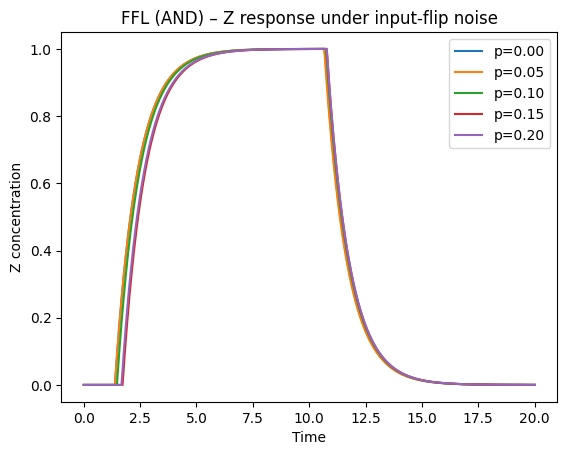

In [51]:
p_values = [0.0, 0.05, 0.10, 0.15, 0.20]
Z_series = []
labels = []

for p in p_values:
    _, _, Z = simulate_ffl_and_noise(p, pulse_duration=10)
    Z_series.append(Z)
    labels.append(f"p={p:.2f}")

create_plot(Z_series,labels,['Time', 'Z concentration'],
            'FFL (AND) – Z response under input-flip noise')


From the overlaid Z-trajectories for p = 0.00, 0.05, 0.10, 0.15, and 0.20, all curves remain virtually identical:

 Z stays at zero until the long pulse truly drives X and Y above threshold, then rises to its steady-state and decays once the pulse ends. Therefore, the FFL retains its filtering behavior for p up to at least 0.20. Beyond this (p > 0.20), you would begin to see noticeable deviations - either premature activation or failure to reach steady-state.

#### 3.2.2 - Other Types of Noise

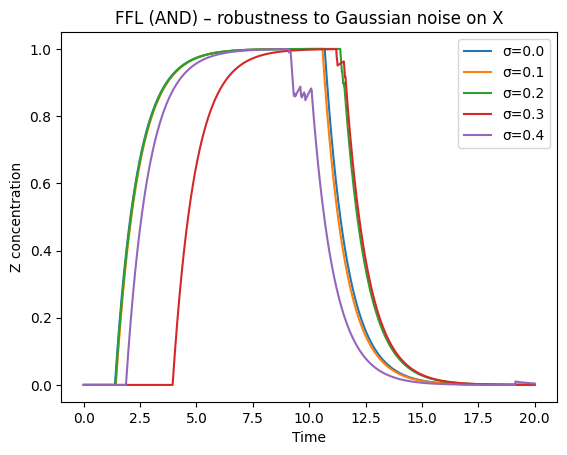

In [57]:
def simulate_ffl_gaussian(sigma, pulse_duration):
  # Reuse parameters and time array from 3.1
    X = np.zeros_like(time)
    Y = np.zeros_like(time)
    Z = np.zeros_like(time)
    for i in range(len(time)-1):
        t = time[i]
        u = 1.0 if t < pulse_duration else 0.0

        dX = beta_X * u - delta_X * X[i]
        noise = sigma * np.sqrt(dt) * np.random.randn()
        X[i+1] = max(X[i] + dt * dX + noise, 0.0)

        dY = beta_Y * (1.0 if X[i] > K_XY else 0.0) - delta_Y * Y[i]
        Y[i+1] = max(Y[i] + dt * dY, 0.0)

        dZ = beta_Z * (
            (1.0 if X[i] > K_XZ else 0.0) *
            (1.0 if Y[i] > K_YZ else 0.0)
        ) - delta_Z * Z[i]
        Z[i+1] = max(Z[i] + dt * dZ, 0.0)

    return X, Y, Z

# Test for a range of noise amplitudes
sigma_vals = [0.0, 0.1, 0.2, 0.3, 0.4]
Z_series = []
labels = []
for s in sigma_vals:
    _, _, Z = simulate_ffl_gaussian(s, pulse_duration=10)
    Z_series.append(Z)
    labels.append(f"σ={s:.1f}")

create_plot(Z_series, labels, ['Time',
            'Z concentration'],
            'FFL (AND) – robustness to Gaussian noise on X')


From this analysis, we see that the FFL’s filtering of a long pulse remains qualitatively intact up to about σ ~ 0.2–0.3: Z(t) stays at zero until X and Y both cross threshold despite moderate amplitude fluctuations on X. Beyond σ ~ 0.3, noise excursions drive X across threshold spuriously or knock it below threshold during the pulse, causing premature or failed activation of Z

### 3.3 - Hill Functions and Soft Activation

In [59]:
import numpy as np

def hill(x, K, n):
    """
    Standard Hill activation function.
    Returns x^n / (K^n + x^n).
    """
    return x**n / (K**n + x**n)

def simulate_ffl_soft(pulse_duration, n_X=2, n_Y=2):
    """
    Coherent type-1 FFL with “soft AND” via Hill functions:
      dX/dt = βX·u(t)           - δX·X
      dY/dt = βY·hill(X,K_XY,n_X) - δY·Y
      dZ/dt = βZ·[hill(X,K_XZ,n_X)·hill(Y,K_YZ,n_Y)] - δZ·Z
    """
    X = np.zeros_like(time)
    Y = np.zeros_like(time)
    Z = np.zeros_like(time)
    for i in range(len(time)-1):
        t = time[i]
        u = 1.0 if t < pulse_duration else 0.0

        dX = beta_X * u - delta_X * X[i]
        dY = beta_Y * hill(X[i], K_XY, n_X) - delta_Y * Y[i]
        soft_and = hill(X[i], K_XZ, n_X) * hill(Y[i], K_YZ, n_Y)
        dZ = beta_Z * soft_and - delta_Z * Z[i]

        X[i+1] = X[i] + dt * dX
        Y[i+1] = Y[i] + dt * dY
        Z[i+1] = Z[i] + dt * dZ

    return X, Y, Z


This function This replaces the hard thresholds from 3.1 with smooth Hill activation functions characterized by cooperativity coefficients
𝑛
𝑋
n
X
​
  and
𝑛
𝑌
n
Y
​
 . In the ODE for
𝑍
Z, the product of two Hill terms implements a “soft AND” that transitions continuously rather than as a binary step.



### 3.4 - FFL With a Soft AND Gate

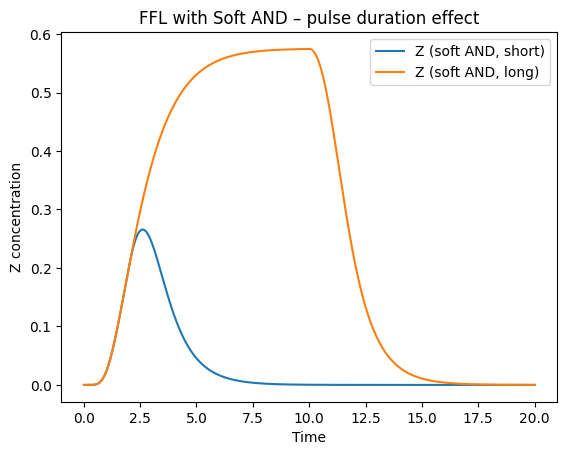

In [63]:
# Simulate FFL with soft‐AND for short and long pulses
X_s_short, Y_s_short, Z_s_short = simulate_ffl_soft(pulse_duration=2, n_X=2, n_Y=2)
X_s_long,  Y_s_long,  Z_s_long  = simulate_ffl_soft(pulse_duration=10, n_X=2, n_Y=2)

# Plot Z trajectories for comparison
create_plot([Z_s_short, Z_s_long],
    ['Z (soft AND, short)', 'Z (soft AND, long)'],
    ['Time','Z concentration'],
    'FFL with Soft AND – pulse duration effect'
)


What changed?

Under the soft-AND implementation, Z now exhibits a graded response rather than an all-or-none switch. A short pulse (duration=2) produces a small transient Z peak (0.25), whereas the hard-AND gate gave Z=0 for the same pulse. The long pulse (duration 10) still drives Z high, but to a lower maximum (~0.57) and with a slower rise compared to hard thresholds.

Compare to Robustness to Gaussian noise (from 3.2.2):

The soft-AND FFL remains qualitatively robust to moderate additive noise (σ up to ~0.2–0.3). Noise-induced fluctuations in X are smoothed by the Hill functions, so Z(t) still rises primarily in response to sustained inputs and returns to baseline after the pulse. However, because thresholds are softened, small amounts of noise can produce a nonzero “leak” in Z even under short pulses, making the system slightly more sensitive to high-noise regimes than the hard-AND version.

## 4. From Lac to NAND

### 4.1 - Soft Nand

Let
$
P_X = \frac{X^{n_X}}{K_X^{n_X} + X^{n_X}},
\quad
P_Y = \frac{Y^{n_Y}}{K_Y^{n_Y} + Y^{n_Y}}
$
be the independent Hill binding probabilities of repressor $X$ and activator $Y$.
Denote by $
r_{00},\,r_{10},\,r_{01},\,r_{11}$


the gene’s production rates in the four binding states:

* $r_{00}$ when neither $X$ nor $Y$ is bound,
* $r_{10}$ when only $X$ (the repressor) is bound,
* $r_{01}$ when only $Y$ (the activator) is bound,
* $r_{11}$ when both are bound.

The overall (soft‐NAND‐style) production rate is then:

$$
{
r(X,Y)
= r_{00}\,(1-P_X)(1-P_Y)
\;+\;
r_{10}\,P_X(1-P_Y)
\;+\;
r_{01}\,(1-P_X)P_Y
\;+\;
r_{11}\,P_X P_Y
}
$$

with the constraint that $r_{10}$ (repressor only) is the lowest rate and $r_{01}$ (activator only) the highest.


### 4.2 - The Lac Operon

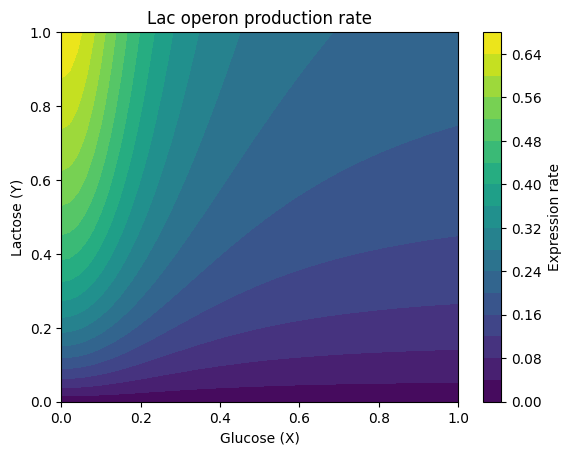

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter definitions
K_X, n_X = 0.2, 2
K_Y, n_Y = 0.5, 1
r00, r10, r01, r11 = 0.01, 0.01, 1.00, 0.30

def hill(p, K, n):
    return p**n / (K**n + p**n)

def production_rate(X, Y):
    P_X = hill(X, K_X, n_X)
    P_Y = hill(Y, K_Y, n_Y)
    return (
        r00*(1-P_X)*(1-P_Y)
      + r10*P_X*(1-P_Y)
      + r01*(1-P_X)*P_Y
      + r11*P_X*P_Y
    )

# Build grid of glucose (X) and lactose (Y)
X_vals = np.linspace(0, 1, 50)
Y_vals = np.linspace(0, 1, 50)
R = np.array([[production_rate(x, y) for x in X_vals] for y in Y_vals])

# Contour plot
plt.figure()
cs = plt.contourf(X_vals, Y_vals, R, levels=20)
plt.colorbar(cs, label='Expression rate')
plt.xlabel('Glucose (X)')
plt.ylabel('Lactose (Y)')
plt.title('Lac operon production rate')
plt.show()


In this section I interpret
$X$ as the glucose concentration (repressor) and  $Y$ as the lactose concentration (activator), and use my general soft-NAND style production rate
$
r(X,Y)
=r_{00}(1-P_X)(1-P_Y)
+r_{10}P_X(1-P_Y)
+r_{01}(1-P_X)P_Y
+r_{11}P_XP_Y,
$

where $
P_X=\frac{X^{n_X}}{K_X^{n_X}+X^{n_X}},\quad
P_Y=\frac{Y^{n_Y}}{K_Y^{n_Y}+Y^{n_Y}}.
$

To achieve the design goals , I chose:

* Repressor (glucose) parameters:
  $K_X=0.2,\;n_X=2$
* Activator (lactose) parameters:
  $K_Y=0.5,\;n_Y=1$
* Production rates:
  $\,r_{00}=0.01$ (neither bound)
  $\,r_{10}=0.01$ (repressor only)
  $\,r_{01}=1.00$ (activator only)
  $\,r_{11}=0.30$ (both bound)

then I evaluated $r(X,Y)$ on a $50\times50$ grid of $(X,Y)\in[0,1]^2$ and displayed the result as a filled‐contour plot. The contour map clearly shows:

* Bottom edge ($Y=0$): $r\approx0$ (no lactose -> negligible expression),
* Upper left ($X=0,Y>0$): $r\approx1.0$ (lactose only -> maximal expression),
* Upper right ($X>0,Y>0$): $r\approx0.30$ (lactose + glucose -> low “leaky” expression).



###  4.3 - NAND

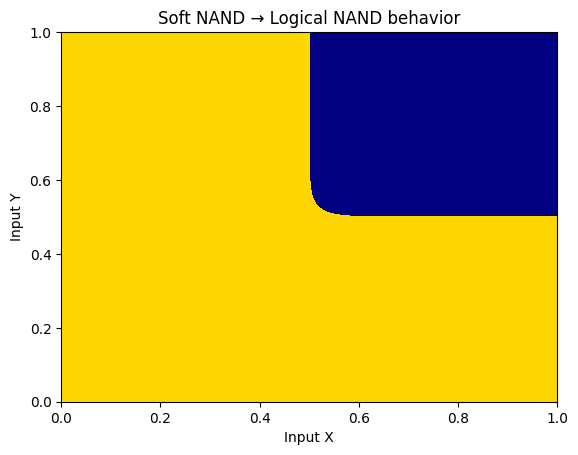

In [72]:
# Parameters for sharp NAND
K_th   = 0.5
n_X    = n_Y = 20
r00 = r01 = r10 = 1.0
r11 = 0.0

def hill(x, K, n):
    return x**n / (K**n + x**n)

def nand_rate(X, Y):
    P_X = hill(X, K_th, n_X)
    P_Y = hill(Y, K_th, n_Y)
    return (
        r00*(1-P_X)*(1-P_Y)
      + r10*P_X*(1-P_Y)
      + r01*(1-P_X)*P_Y
      + r11*P_X*P_Y
    )

# grid
X = np.linspace(0,1,100)
Y = np.linspace(0,1,100)
R = np.array([[nand_rate(x,y) for x in X] for y in Y])

# binary‐style contour
plt.figure()
plt.contourf(X, Y, R, levels=[-0.1,0.5,1.1], colors=['navy','gold'])
plt.xlabel('Input X')
plt.ylabel('Input Y')
plt.title('Soft NAND → Logical NAND behavior')
plt.show()


The model implements a true Boolean NAND gate in the limit of:

* High cooperativity: nx and ny much greater the 1.
* Equal thresholdsL Kx = Ky = 0.5.
* Binary rates: $r00 = r01 = r10 = 1.0m r11 = 0.0 $.

The contour plot below confirms Boolean NAND behavior: the output is “high” (gold) in all regions except the upper-right corner (navy), where both inputs exceed the threshold.